In [1]:
%load_ext tensorboard

In [1]:
import tensorflow as tf
import datetime

2024-07-10 11:34:42.781414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
%pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install matplotlib

  Using cached matplotlib-3.9.1-cp311-cp311-macosx_10_12_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00a 0:00:01
Using cached matplotlib-3.9.1-cp311-cp311-macosx_10_12_x86_64.whl (7.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 31.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 13.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
import keras
import numpy as np
import keras_tuner
import numpy as np
import matplotlib.pyplot as plt


In [23]:
from tensorflow import keras
from tensorflow.keras import utils, layers
from tensorflow.keras.activations import linear, sigmoid, tanh, relu
from tensorflow.keras.layers import LeakyReLU, ELU, Dense, Dropout, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard
from kerastuner.tuners import RandomSearch

In [24]:
data = fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

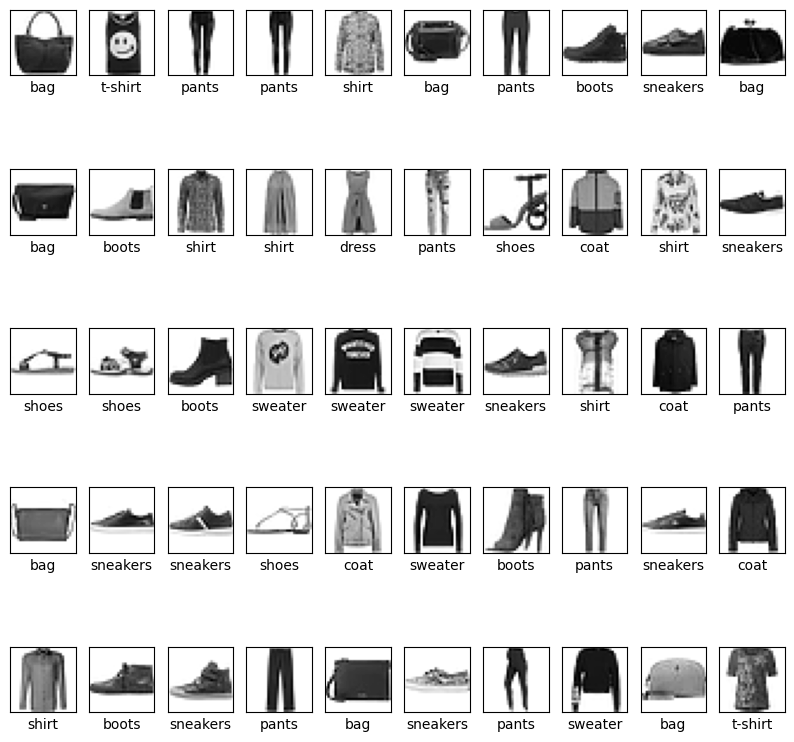

In [25]:
# classes = ['футболка', 'брюки', 'світер', 'cукня', 'пальто', 'туфлі', 'рубашка', 'кросівки', 'сумка', 'ботинки']
classes = ['t-shirt', 'pants', 'sweater', 'dress', 'coat', 'shoes', 'shirt', 'sneakers', 'bag', 'boots']

plt.figure(figsize=(10,10))
for i in range(100, 150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [20]:
# Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

# Model with manually specified hyper parameters

### Hyper parameters

In [44]:
epochs = 50
steps_per_epoch = 1_2000
batch_size = 1 * 64
l2_parameter = 1e-3
learning_rate = 1e-4

In [45]:


model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  )

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Тренування та оцінка моделі
model_history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 12.3566 - accuracy: 0.7181 - val_loss: 6.8159 - val_accuracy: 0.7627
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 4.7511 - accuracy: 0.7854 - val_loss: 4.1075 - val_accuracy: 0.7854
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 3.0085 - accuracy: 0.7983 - val_loss: 2.8316 - val_accuracy: 0.7943
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0479 - accuracy: 0.8104 - val_loss: 2.0497 - val_accuracy: 0.8091
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4882 - accuracy: 0.8159 - val_loss: 1.4331 - val_accuracy: 0.7894
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8690 - accuracy: 0.8004 - val_loss: 0.9200 - val_accuracy: 0.7919
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6171 - accuracy: 0.8223 - val_loss: 0.7809 - val_accuracy

In [47]:
# Оцінка якості навчання
scores = model.evaluate(x_test, y_test, verbose=1)
print("Правильні відповіді, у відсотках:", round(scores[1] * 100, 2))

313/313 [==============================] - 0s 1ms/step - loss: 0.6338 - accuracy: 0.8633
Правильні відповіді, у відсотках: 86.33


Test accuracy: 0.8633000254631042
Test loss: 0.6337795853614807


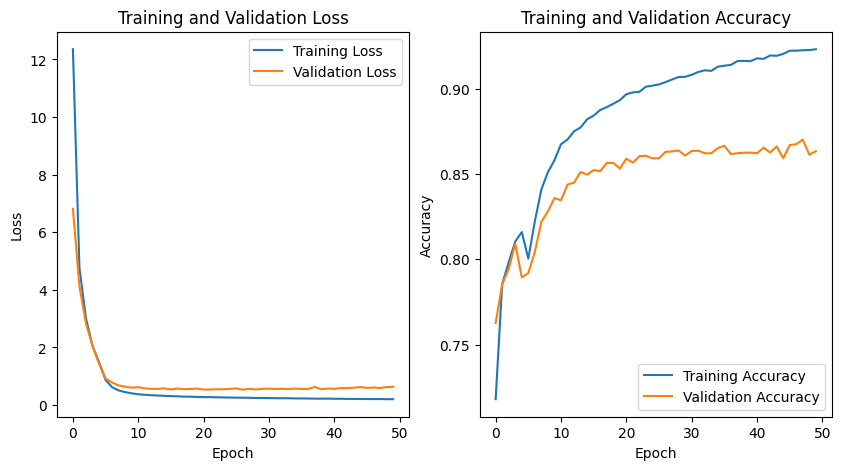

In [48]:
# Тренування та оцінка моделі
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Виведення кривих навчання
plt.figure(figsize=(10, 5))

# Втрати на тренувальному та валідаційному наборах
plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Точність на тренувальному та валідаційному наборах
plt.subplot(1, 2, 2)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

1/1 [==============================] - 0s 45ms/step


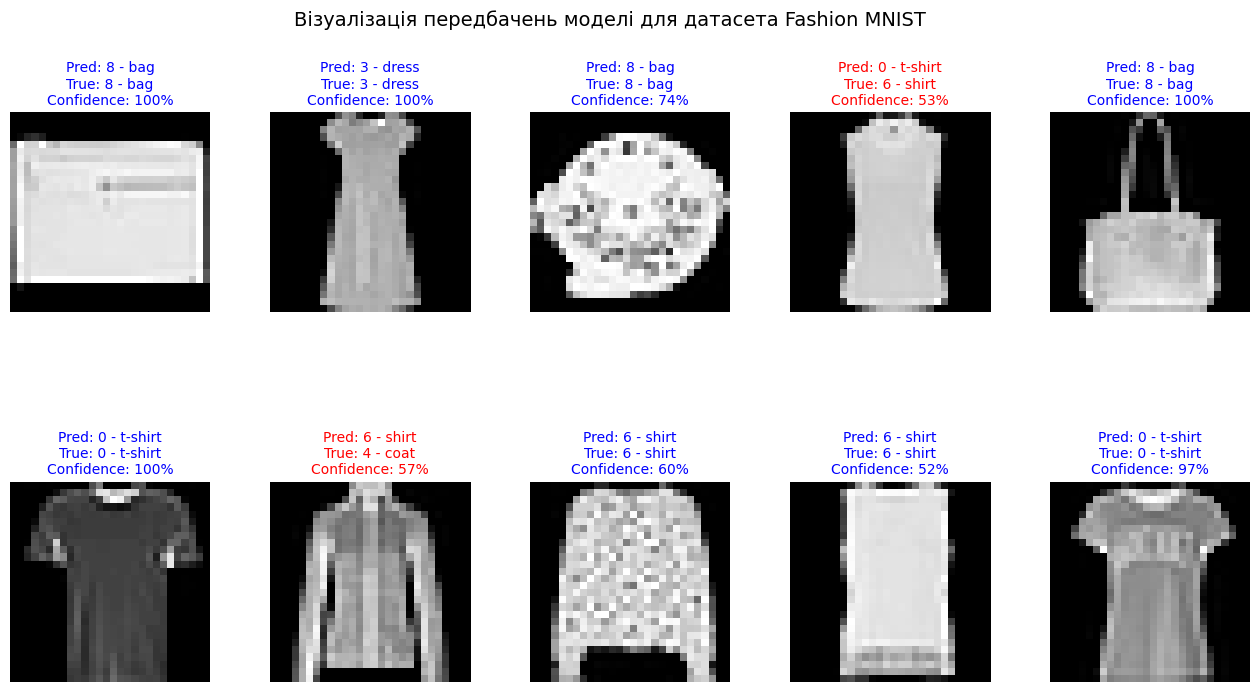

In [49]:
# Визначення кількості випадкових зображень для відображення
number_of_images = 10

# Створення сітки для відображення зображень
f, ax = plt.subplots(2, 5, figsize=(16, 8))
f.subplots_adjust(hspace=0.5, wspace=0.3)
f.suptitle("Візуалізація передбачень моделі для датасета Fashion MNIST", fontsize=14)

# Вибір випадкових індексів для зображень
random_indices = np.random.choice(len(x_test), size=number_of_images, replace=False)

# Цикл для відображення зображень та їх передбачень
for i, idx in enumerate(random_indices):
    # Отримання зображення та його справжньої мітки
    img, true_label = x_test[idx], y_test[idx]

    # Розпізнання зображення
    predictions = model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(predictions)
    confidence = np.max(predictions) * 100

    # Встановлення кольору для заголовка в залежності від правильності передбачення
    color = 'blue' if predicted_label == true_label else 'red'

    # Вивід зображення
    ax[i // 5, i % 5].imshow(img, cmap='gray')
    ax[i // 5, i % 5].axis('off')
    ax[i // 5, i % 5].set_title(f"Pred: {predicted_label} - {classes[predicted_label]}\nTrue: {true_label} - {classes[true_label]}\nConfidence: {confidence:.0f}%", fontsize=10, color=color)

plt.show()

# Model using Kerastuner

### Selection of hyperparameters with Kerastuner

In [103]:
def build_model(hp):
    # Створюємо модель послідовної архітектури
    model = keras.Sequential()

    # Додаємо Flatten шар для перетворення багатовимірних вхідних даних у одномірний вектор
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Додаємо Dense шар з налаштовуваною кількістю нейронів та активаційною функцією
    model.add(
        layers.Dense(
            # Налаштовуємо кількість нейронів
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Обираємо функцію активації
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )

    # Якщо гіперпараметр dropout є True, додається шар Dropout з частотою відсіву 0.25
    # Для запобігання перенавчанню моделі
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))

    # Додаємо шар softmax для класифікації
    model.add(layers.Dense(10, activation="softmax"))

    # Обираємо оптимізатор та швидкість навчання
    optimizer_choice = hp.Choice("optimizer", ["adam", "sgd", "rmsprop"])
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    if optimizer_choice == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == "sgd":
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_choice == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [106]:
tuner = RandomSearch(
    hypermodel=build_model, #Функція побудови моделі, яка є build_modelв нашому випадку.
    objective="val_accuracy",#Назва цілі, яку потрібно оптимізувати (мінімізувати чи максимізувати)
    max_trials=10,#Загальна кількість спроб, які потрібно виконати під час пошуку.
    executions_per_trial=5,#Кількість моделей, які слід створити та підібрати для кожного випробування.
    #Якщо ви хочете отримати результати швидше, ви можете встановити executions_per_trial=1(один цикл навчання для кожної конфігурації моделі).
    overwrite=True, #чи перезаписувати попередні результати в тому самому каталозі
    directory="my_dir",
    project_name="fashion_mnist_classification",
)

In [107]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [115]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Установим коллбэки для остановки обучения при отсутствии улучшений и уменьшения скорости обучения
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Поиск гиперпараметров
tuner.search(
    x_train, y_train,
    epochs=15,  # Значение может быть изменено в зависимости от задачи и доступных ресурсов
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Получение лучшей модели
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 448)               351680    
                                                                 
 dropout (Dropout)           (None, 448)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                4490      
                                                                 
Total params: 356,170
Trainable params: 356,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# # Отримання найкращої моделі
# best_model = tuner.get_best_models(num_models=1)[0]
# best_model.summary()

In [116]:
b_history = best_model.fit(
    x_train, y_train,
    epochs=20,  # Значение может быть изменено в зависимости от задачи и доступных ресурсов
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
    )

b_test_loss, b_test_acc = best_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5135 - accuracy: 0.8529 - val_loss: 0.6393 - val_accuracy: 0.8583 - lr: 2.5481e-05
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5105 - accuracy: 0.8558 - val_loss: 0.6430 - val_accuracy: 0.8541 - lr: 2.5481e-05
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5021 - accuracy: 0.8585 - val_loss: 0.6591 - val_accuracy: 0.8539 - lr: 2.5481e-05
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5019 - accuracy: 0.8565 - val_loss: 0.6539 - val_accuracy: 0.8571 - lr: 2.5481e-05
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4910 - accuracy: 0.8601 - val_loss: 0.6484 - val_accuracy: 0.8604 - lr: 5.0962e-06
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6393 - accuracy: 0.8583
Test accuracy: 0.8179000020027161
Test loss: 0.507378101348877


In [117]:
# Оцінка якості навчання
scores = best_model.evaluate(x_test, y_test, verbose=1)
print("Правильні відповіді, у відсотках:", round(scores[1] * 100, 2))

313/313 [==============================] - 1s 2ms/step - loss: 0.6393 - accuracy: 0.8583
Правильні відповіді, у відсотках: 85.83


Test accuracy: 0.858299970626831
Test loss: 0.6392562389373779


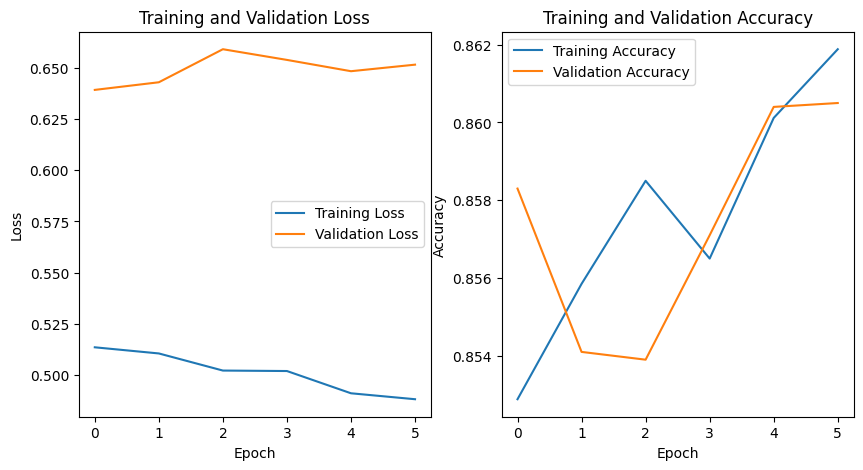

In [118]:
# Тренування та оцінка моделі
print('Test accuracy:', b_test_acc)
print('Test loss:', b_test_loss)

# Виведення кривих навчання
plt.figure(figsize=(10, 5))

# Втрати на тренувальному та валідаційному наборах
plt.subplot(1, 2, 1)
plt.plot(b_history.history['loss'], label='Training Loss')
plt.plot(b_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Точність на тренувальному та валідаційному наборах
plt.subplot(1, 2, 2)
plt.plot(b_history.history['accuracy'], label='Training Accuracy')
plt.plot(b_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

1/1 [==============================] - 0s 24ms/step


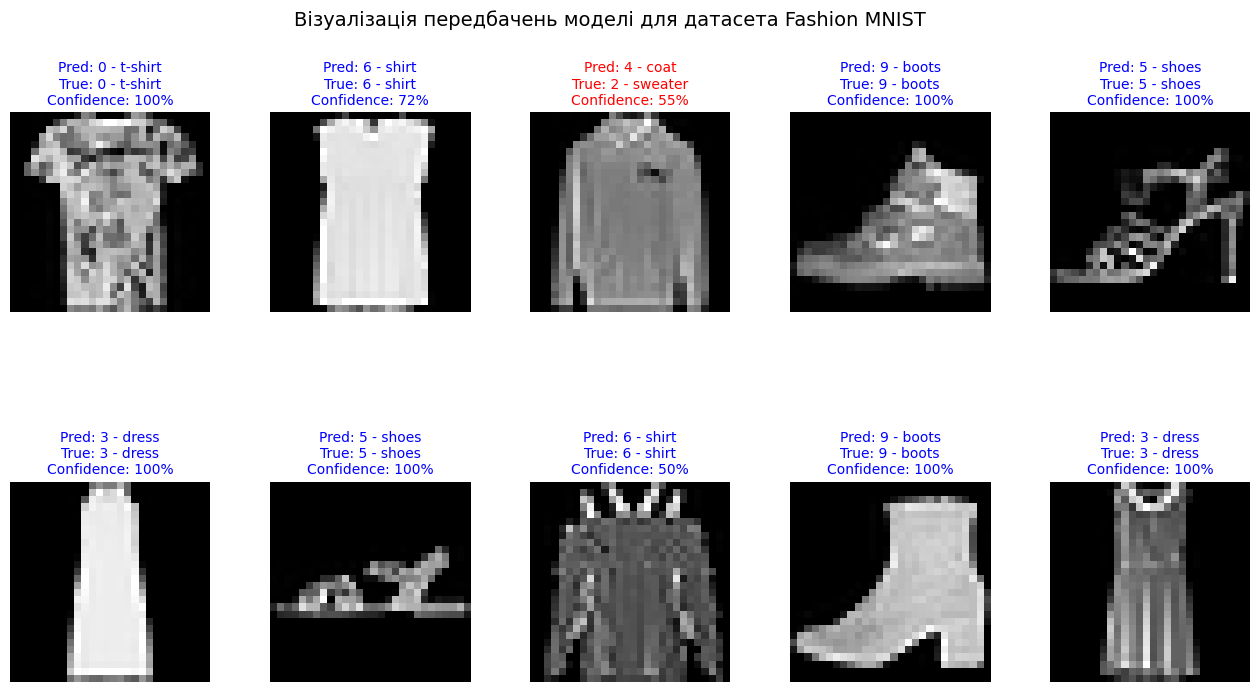

In [119]:
# Визначення кількості випадкових зображень для відображення
number_of_images = 10

# Створення сітки для відображення зображень
f, ax = plt.subplots(2, 5, figsize=(16, 8))
f.subplots_adjust(hspace=0.5, wspace=0.3)
f.suptitle("Візуалізація передбачень моделі для датасета Fashion MNIST", fontsize=14)

# Вибір випадкових індексів для зображень
random_indices = np.random.choice(len(x_test), size=number_of_images, replace=False)

# Цикл для відображення зображень та їх передбачень
for i, idx in enumerate(random_indices):
    # Отримання зображення та його справжньої мітки
    img, true_label = x_test[idx], y_test[idx]

    # Розпізнання зображення
    predictions = model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(predictions)
    confidence = np.max(predictions) * 100

    # Встановлення кольору для заголовка в залежності від правильності передбачення
    color = 'blue' if predicted_label == true_label else 'red'

    # Вивід зображення
    ax[i // 5, i % 5].imshow(img, cmap='gray')
    ax[i // 5, i % 5].axis('off')
    ax[i // 5, i % 5].set_title(f"Pred: {predicted_label} - {classes[predicted_label]}\nTrue: {true_label} - {classes[true_label]}\nConfidence: {confidence:.0f}%", fontsize=10, color=color)

plt.show()

# Conclusion